# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Yudistira Dwi Permana  
- Email: yudisdwi02@gmail.com
- Id Dicoding: yudisdwi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [74]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector
import joblib
import numpy as np
import math

### Menyiapkan data yang akan diguankan

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv', sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Output pada cell sebelumnya (`df.info()` dan `df.shape`) memberikan informasi mengenai struktur DataFrame. Berikut penjelasannya:

- **Jumlah kolom**: Terdapat 37 kolom pada DataFrame.
- **Nama kolom dan tipe data**: Setiap kolom ditampilkan beserta jumlah data yang tidak kosong (non-null) dan tipe datanya (`int64`, `float64`, atau `object`). masih banyak yang belum sesuai dengan tipe datanya.
- **Jumlah baris**: Terdapat 4424 baris data.
- **Kolom 'Status'**: Bertipe `object`, yang akan menjadi data target yang merupakan data status siswa.

Secara umum, output ini membantu memahami tipe data, jumlah data, dan tidak ada data yang hilang pada setiap kolom.

In [77]:
# Menampilkan statistik deskriptif untuk seluruh kolom numerik pada dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


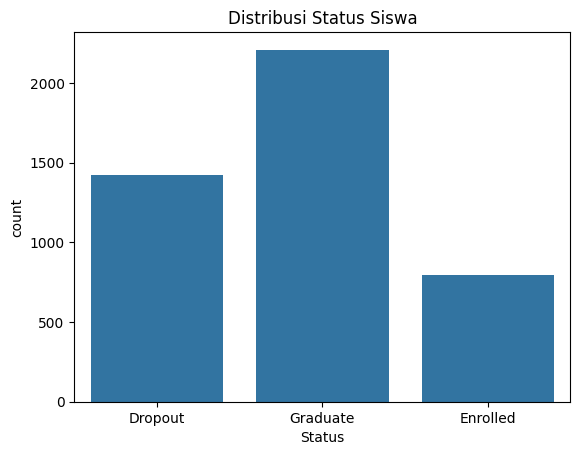

In [78]:
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status Siswa')
plt.show()

## Data Preparation / Preprocessing

In [79]:
# Menghilangkan duplikasi
df.drop_duplicates(inplace=True)
# Cek ulang jumlah baris dan kolom setelah menghilangkan duplikasi
df.shape

(4424, 37)

In [80]:
# Memisahkan fitur sesuai dengan isi Dataframe
# Fitur numerik (berupa angka kontinu atau diskrit)
numeric_features = [
    'Application_order', 'Previous_qualification_grade', 'Admission_grade',
    'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate', 'Inflation_rate', 'GDP'
]

# Fitur ordinal (ada urutan jelas, biasanya berupa level pendidikan/posisi)
ordinal_features = [
    'Marital_status', 'Mothers_qualification', 'Fathers_qualification'
]
# Fitur nominal (kategori tanpa urutan jelas)
nominal_features = [
    'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality',
    'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender',
    'Scholarship_holder', 'International'
]

status = ['Status']


In [81]:
# Memfilter data untuk explorasi lebih lanjut
# Menyimpan salinan dataframe asli untuk eksplorasi lebih lanjut

most_feature = df.copy()

for col in ordinal_features + nominal_features:
    top3 = most_feature[col].value_counts().nlargest(3).index
    rows_to_drop = most_feature[~most_feature[col].isin(top3)].index
    most_feature = most_feature.drop(rows_to_drop)

In [82]:
# Mapping nilai numerik ke kategori yang lebih deskriptif
Marital_status = {
    1: 'Single',
    2: 'Married',
    4: 'Divorced',
}

qualification = {
    1: "12th Year of Schooling",
    19: "Basic Ed. 3rd Cycle",
    37: "Basic Ed. 1st Cycle",
}

application_mode = {
    1: "1st phase - general contingent",
    17: "2nd phase - general contingent",
    39: "Over 23 years old",
}

course = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}

daytime_evening_attendance = {
    1: "Daytime"
}

previous_qualification = {
    1: 'Secondary Edu',
    12: "Other - 11th School",
    19: "Basic Ed. 3rd Cycle",
}

nacionality = {
    1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian", 13: "Dutch",
    14: "English", 17: "Lithuanian", 21: "Angolan", 22: "Cape Verdean",
    24: "Guinean", 25: "Mozambican", 26: "Santomean", 32: "Turkish",
    41: "Brazilian", 62: "Romanian", 100: "Moldova (Republic of)",
    101: "Mexican", 103: "Ukrainian", 105: "Russian", 108: "Cuban", 109: "Colombian",
}

occupation = {
    4: "Administrative staff",
    5: "Personal Services",
    9: "Unskilled Workers",
}

occupation2 = {
    5: "Personal Services",
    7: "Skilled Workers in Industry",
    9: "Unskilled Workers",
}

bolops = {
    0: "No",
    1: "Yes"
}


gender = {
    0: "Female",
    1: "Male"
}

most_feature['Marital_status'] = most_feature['Marital_status'].map(Marital_status)
most_feature['Mothers_qualification'] = most_feature['Mothers_qualification'].map(qualification)
most_feature['Fathers_qualification'] = most_feature['Fathers_qualification'].map(qualification)
most_feature['Application_mode'] = most_feature['Application_mode'].map(application_mode)
most_feature['Course'] = most_feature['Course'].map(course)
most_feature['Daytime_evening_attendance'] = most_feature['Daytime_evening_attendance'].map(daytime_evening_attendance)
most_feature['Previous_qualification'] = most_feature['Previous_qualification'].map(previous_qualification)
most_feature['Nacionality'] = most_feature['Nacionality'].map(nacionality)
most_feature['Mothers_occupation'] = most_feature['Mothers_occupation'].map(occupation)
most_feature['Fathers_occupation'] = most_feature['Fathers_occupation'].map(occupation2)
bolops_cols = ['Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'International']
most_feature[bolops_cols] = most_feature[bolops_cols].apply(lambda col: col.map(bolops))
most_feature['Gender'] = most_feature['Gender'].map(gender)

## EDA

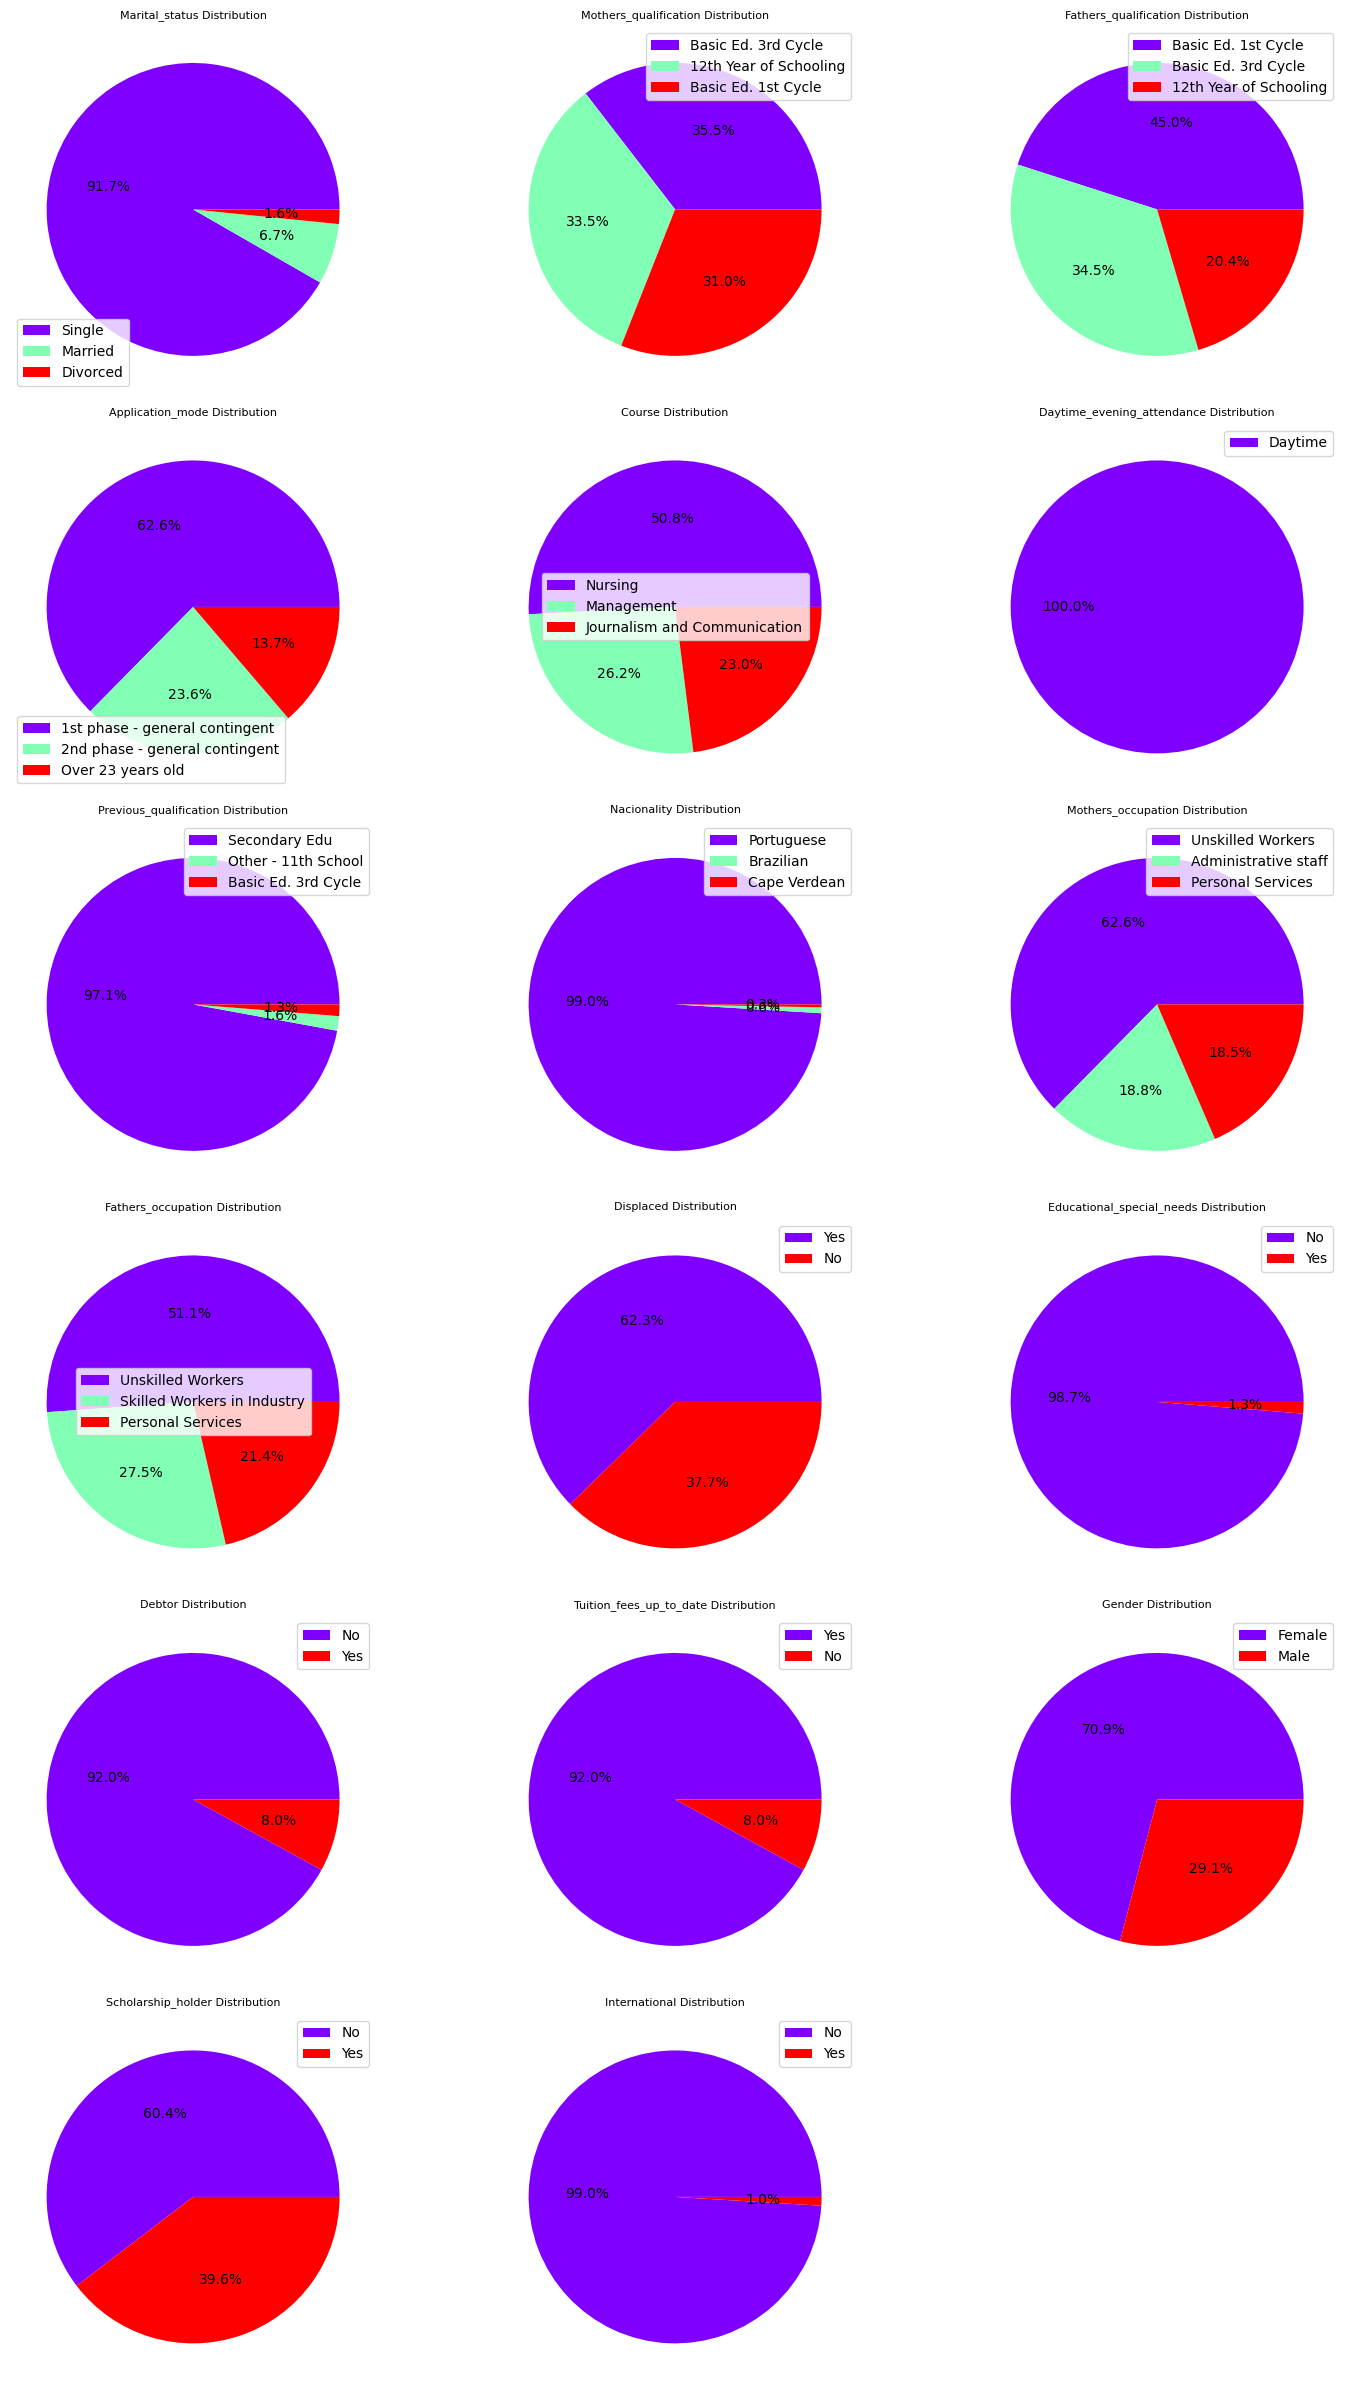

In [83]:
# Gabungkan fitur kategorikal
features = ordinal_features + nominal_features

# Tentukan layout: 3 kolom per baris
n_cols = 3
n_rows = math.ceil(len(features) / n_cols)

# Buat kanvas grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Plot setiap fitur
for i, col in enumerate(features):
    most_feature[col].value_counts().plot(kind='pie', ax=axes[i], cmap='rainbow', autopct='%1.1f%%', ylabel='', legend=True, labels=None)
    axes[i].set_title(f'{col} Distribution', fontsize=8)


# Hapus sisa subplot kosong kalau jumlah fitur tidak habis dibagi 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---
### Kesimpulan Umum
Mayoritas pelajar adalah **perempuan, lajang, warga negara Portugis**, dengan latar belakang pendidikan **menengah atas**, berasal dari keluarga dengan **orang tua berpendidikan menengah ke bawah dan bekerja di sektor non-terampil**. Sebagian besar **membayar biaya kuliah tepat waktu**, **tidak memiliki hutang**, serta **bukan mahasiswa internasional**. Program studi **Keperawatan** menjadi pilihan paling populer.

---

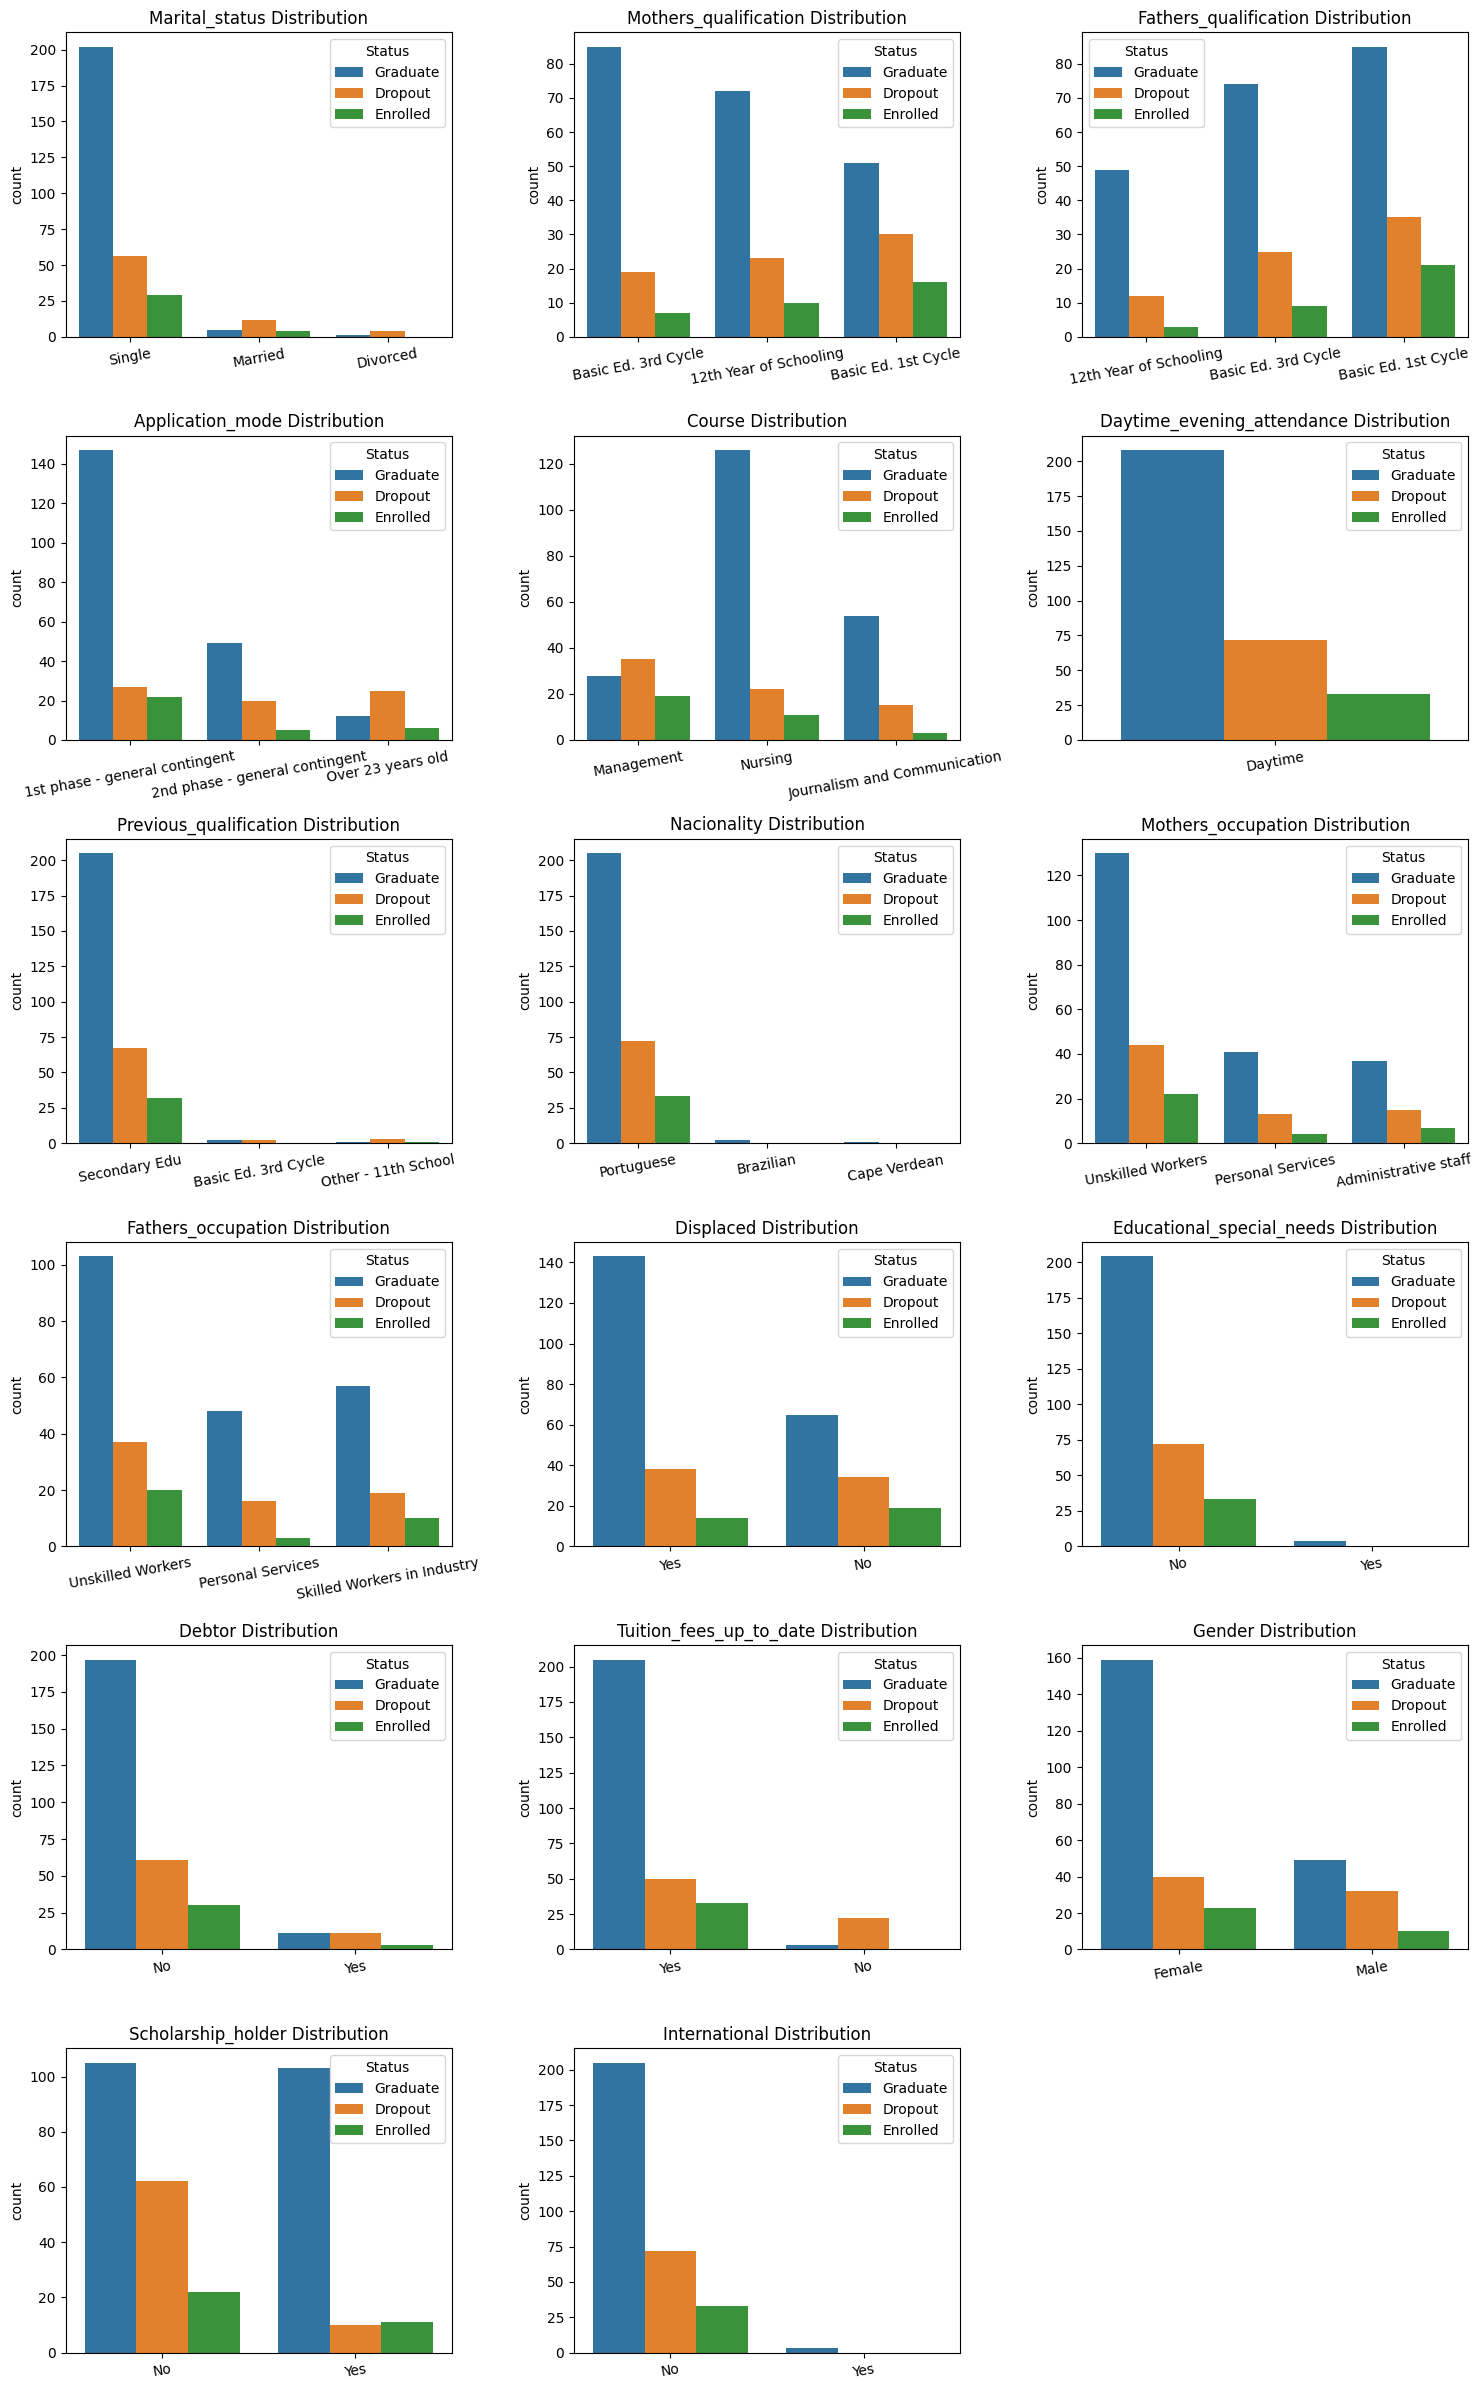

In [84]:
# # Tentukan layout: 3 kolom per baris
n_cols = 3
n_rows = math.ceil(len(features) / n_cols)

# # Buat kanvas grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# 2. Loop dan gambar grafik pada Axes yang benar
for i, col in enumerate(features):
    # Parameter 'ax=axes[i]' adalah kunci agar plot digambar di sub-grafik ke-i
    sns.countplot(
        x=col, 
        hue="Status",
        data=most_feature, 
        ax=axes[i],
    )
    axes[i].set_title(f'{col} Distribution', fontsize=12)
    axes[i].tick_params(axis='x', rotation=10) 
    axes[i].set_xlabel('') 

# Hapus sisa subplot kosong kalau jumlah fitur tidak habis dibagi 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# Mengatur tata letak agar judul dan label tidak tumpang tindih
plt.tight_layout()

# Tampilkan Figure yang berisi semua sub-grafik
plt.show()

___
Secara keseluruhan, mayoritas pelajar yang **lulus** memiliki ciri-ciri sebagai berikut:  
- **Berstatus single**  
- **Berasal dari keluarga dengan pendidikan orang tua menengah ke bawah (Basic Education)**  
- **Mendaftar melalui jalur umum (1st phase)**  
- **Mengambil jurusan Nursing**  
- **Berkewarganegaraan Portugis**  
- **Orang tua bekerja di sektor unskilled labor**  
- **Tidak memiliki hutang dan membayar biaya kuliah tepat waktu**  
- **Berjenis kelamin perempuan**  
- **Bukan mahasiswa internasional**
Sementara itu, pelajar **dropout** cenderung muncul pada kategori dengan kondisi finansial kurang stabil, hutang pendidikan, atau orang tua dengan pendidikan rendah dan pekerjaan tidak tetap.
 ---

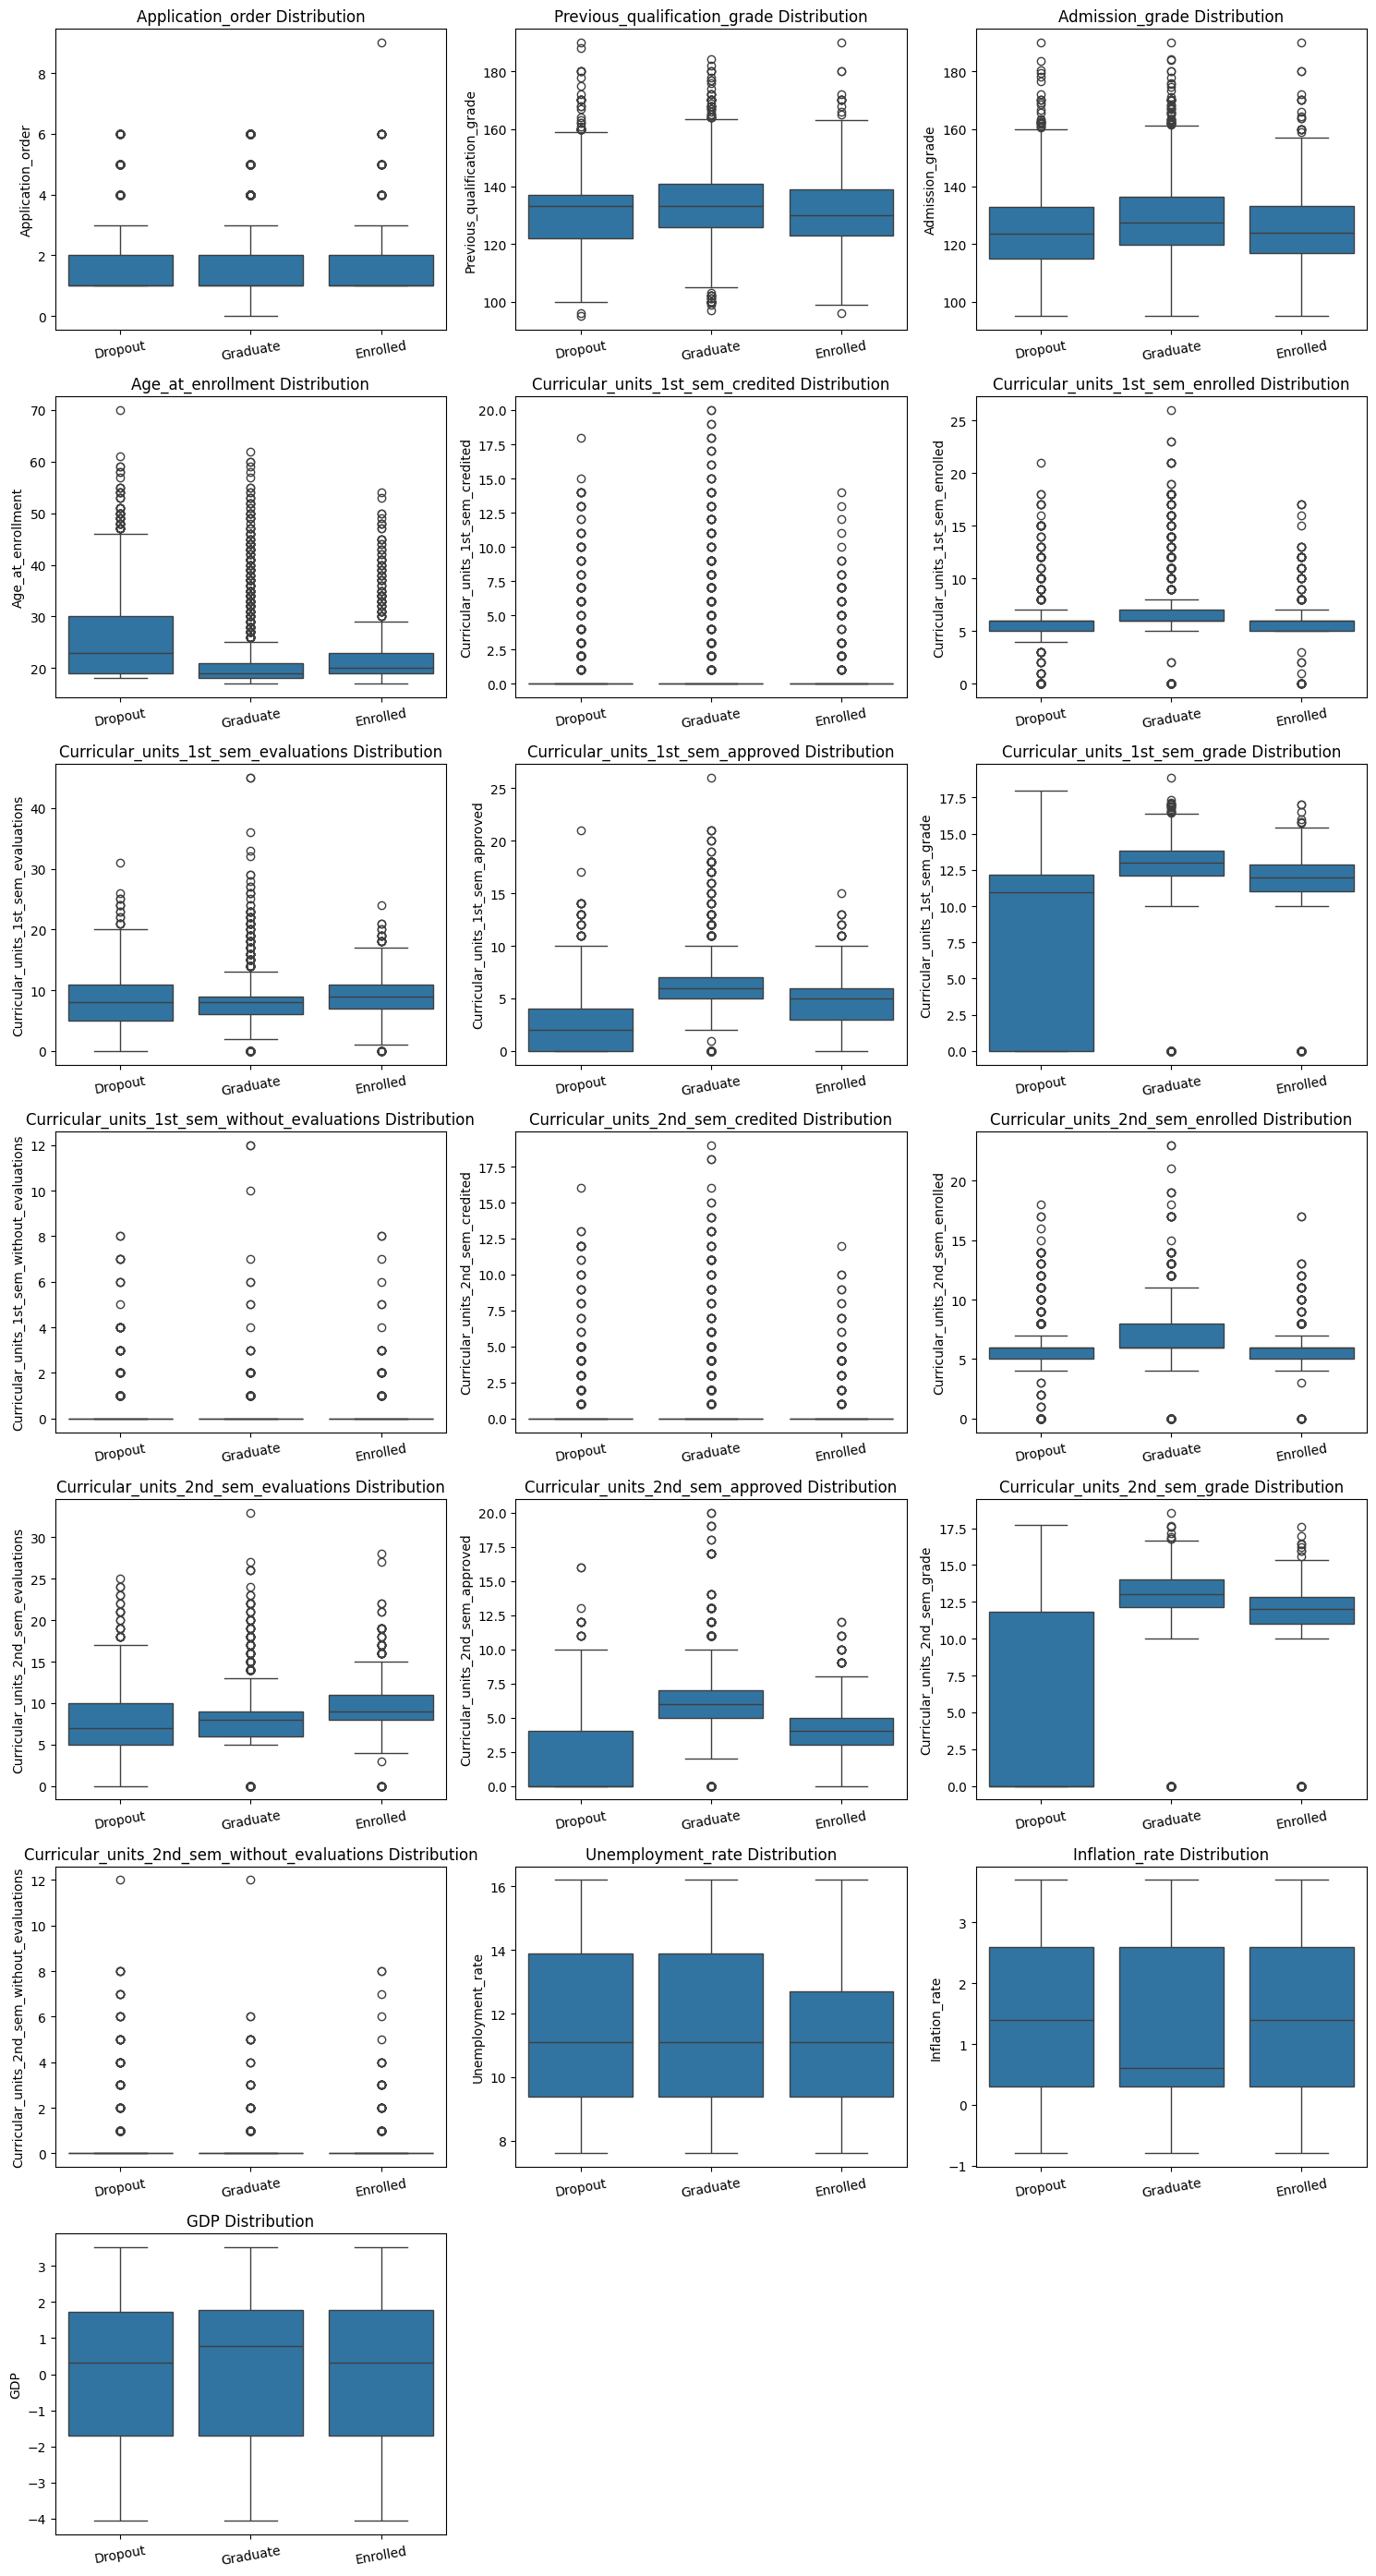

In [85]:
# Tentukan layout: 3 kolom per baris
n_cols = 3
n_rows = math.ceil(len(numeric_features) / n_cols)

# Buat kanvas grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# 2. Loop dan gambar grafik pada Axes yang benar
for i, col in enumerate(numeric_features):
    # Parameter 'ax=axes[i]' adalah kunci agar plot digambar di sub-grafik ke-i
    sns.boxplot(
        y=col, 
        x='Status',
        data=df, 
        ax=axes[i],
    )
    axes[i].set_title(f'{col} Distribution', fontsize=12)
    axes[i].tick_params(axis='x', rotation=10) 
    axes[i].set_xlabel('') 

# Hapus sisa subplot kosong kalau jumlah fitur tidak habis dibagi 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


# Mengatur tata letak agar judul dan label tidak tumpang tindih
plt.tight_layout()

# Tampilkan Figure yang berisi semua sub-grafik
plt.show()

---
Secara keseluruhan:
- **Mahasiswa yang lulus (Graduate)** menunjukkan performa akademik yang stabil dan kuat sejak awal — nilai masuk tinggi, partisipasi aktif dalam evaluasi, dan lebih banyak mata kuliah yang disetujui.  
- **Mahasiswa dropout** memiliki nilai awal rendah, partisipasi akademik minim, dan cenderung lebih tua pada saat pendaftaran.  
- Faktor eksternal seperti **tingkat pengangguran, inflasi, dan GDP** tampaknya **tidak signifikan** dalam memengaruhi status kelulusan.  
- Keberhasilan akademik sangat dipengaruhi oleh **prestasi awal dan konsistensi akademik dalam dua semester pertama**.
---

In [86]:
# Setelah Explorasi data ternyata data maemiliki outliers pada beberapa kolom numerik
# Menghitung IQR untuk setiap kolom numerik
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]


print("Jumlah baris yang dihapus:", df.shape[0] - df_filtered_numeric.shape[0])

Jumlah baris yang dihapus: 2422


In [87]:
numeric_features = [
    'Admission_grade',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations',
    
]

# Fitur ordinal (ada urutan jelas, biasanya berupa level pendidikan/posisi)
ordinal_features = [
    'Marital_status', 'Mothers_qualification', 'Fathers_qualification'
]
# Fitur nominal (kategori tanpa urutan jelas)
nominal_features = [
    'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality',
    'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender',
    'Scholarship_holder', 'International'
]


In [88]:
df['Course'] = df['Course'].map(course)
df['Nacionality'] = df['Nacionality'].map(nacionality)
df['Gender'] = df['Gender'].map(gender)
df['Marital_status'] = df['Marital_status'].map(Marital_status).fillna("Divorced")

In [89]:
# Dari kesimpulan diatas, terdapat fitur yang tidak terlalu berpengaruh terhadap status siswa
# Menghapus beberapa fitur yang inrelevant

inrelevant_col = ['Application_order', 'Previous_qualification_grade', 'Unemployment_rate', 'Inflation_rate', 
                  'GDP', 'Mothers_qualification', 'Fathers_qualification', 'Application_mode', 'Daytime_evening_attendance',
    'Previous_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder', 'International']
df.drop(columns=inrelevant_col, inplace=True)

In [90]:
df.to_csv("clean_data.csv", index=False)

In [91]:
df.head()

,Marital_status,Course,Nacionality,Admission_grade,Gender,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,Single,Animation and Multimedia Design,Portuguese,127.3,Male,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,Single,Tourism,Portuguese,142.5,Male,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,Single,Communication Design,Portuguese,124.8,Male,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,Single,Journalism and Communication,Portuguese,119.6,Female,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,Married,Social Service (evening attendance),Portuguese,141.5,Female,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,Graduate


## MODELING

In [92]:
# Memperbarui daftar fitur untuk model setelah menghapus kolom
for lst in (numeric_features, ordinal_features, nominal_features):
    lst[:] = [col for col in lst if col not in inrelevant_col]

In [93]:
# Memisahkan fitur dan target
X = df.drop('Status', axis=1)
y = df['Status']

In [94]:
# encode fitur object agar data target bisa di train
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [95]:
# Train Model ColumnTransformer Berbagai Tipe Data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_features),
    ]
)

# Pipeline dengan Random Forest
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Train model
model.fit(X_train, y_train)
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.738


## EVALUATION

In [96]:
joblib.dump(model, "modelRF.joblib")
print("Model saved as modelRF.joblib")

Model saved as modelRF.joblib
